TensorFlow là một thư viện mã nguồn mở dùng để training/inference machine learning model có thể sử dụng cho cả nghiên cứu và sản phẩm. TensorFlow là một thư viện mã nguồn mở dùng để training/inference machine learning model có thể sử dụng cho cả nghiên cứu và sản phẩm. TensorFlow được ghép bởi 2 từ **Tensor** và **Flow**. Tensor đại diện cho giá trị các biến, Flow là dòng chảy. TensorFlow mang hàm ý là dòng chảy các giá trị trong Graph. Và trái tim của TensorFlow chính là **Computational Graph.**

- Computational Graphs:
> Computational Graph tương tự một Graph thông thường gồm nhiều đỉnh và các cạnh. Nó dùng để biểu diễn các phép tính toán dựa trên ngôn ngữ của Graph.
> - Đỉnh (Node) đại diện cho biến đầu vào, phép tính toán
> - Các cạnh (Edge) đại điện cho dữ liệu truyền bên trong Graph

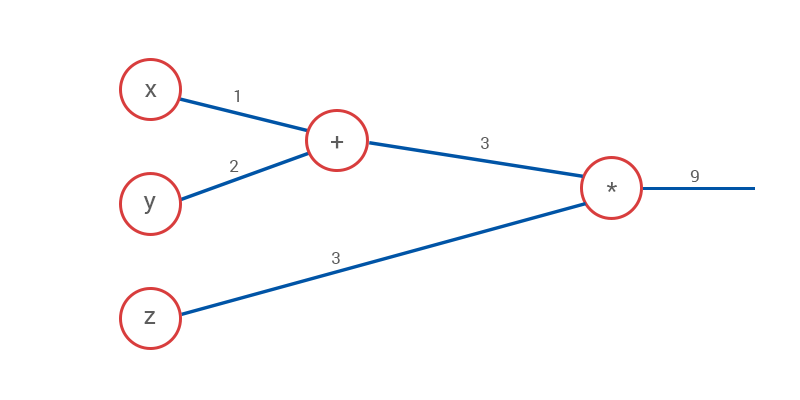

In [ ]:
import tensorflow as tf

In [ ]:
# In version hiện tại
tf.__version__

'2.4.1'

In [ ]:
tf.print("hello world")

<tf.Operation 'PrintV2' type=PrintV2>

# **1. Constant**

là các đại lượng không thay đổi trong quá trình chạy chương trình

In [ ]:
x1 = tf.constant(1, name = 'const_x1')
x1

<tf.Tensor 'const_x1_1:0' shape=() dtype=int32>

In [ ]:
x2 = tf.constant(2.)
x2

<tf.Tensor 'Const_2:0' shape=() dtype=float32>

In [ ]:
# đặt dtype cho constance
x3 = tf.constant(3, dtype='float32')
x3

<tf.Tensor 'Const_3:0' shape=() dtype=float32>

In [ ]:
# kiểu vector
v1 = tf.constant([1, 2, 3], dtype= tf.float32, name='v1_const-vector')
print(v1)

Tensor("v1_const-vector:0", shape=(3,), dtype=float32)


In [ ]:
## in giá  trị 
sess = tf.compat.v1.Session()
sess.run(x2)


2.0

In [ ]:
sess.run(v1)

array([1., 2., 3.], dtype=float32)

**Chú ý**: tensor có thể là một số thực, số nguyên, chuỗi, ma trận 1D, 2D, 3D,.. multi-demension matrix

In [ ]:
# Khởi tạo constant tensor 2D
v2 = tf.constant([
                  [1, 2, 3],
                  [4, 5, 6]
], dtype = tf.float32, name = '2D_matrix')

sess.run(v2)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [ ]:
# 1 cách in khác
sess = tf.compat.v1.Session()
v2.eval(session = sess) # phải truyền vào session hiện tại

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

# **2. Perform Operator**

In [ ]:
# Các phép tính toán thì các biến phải cùng 1 kiều
y1 = x1 + x2 # lỗi

TypeError: ignored

In [ ]:
y2 = x2 + x3
print(y2)

Tensor("add_3:0", shape=(), dtype=float32)


**Chú ý**: Khi xử lý trên tensor thì phải cùng dtype

In [ ]:
sess.run(y2)

5.0

In [ ]:
v3 = tf.constant([
                  [4, 6, 2],
                  [1, 8, 3]
], dtype = tf.float32, name = '2D_matrix')


In [ ]:
sess.run(v2+v3)

array([[ 5.,  8.,  5.],
       [ 5., 13.,  9.]], dtype=float32)

# **3. Placeholder**

Sử dụng trong trường hợp chúng ta cần load dữ liệu đầu vào 

## **3.1. Khởi tạo**

In [ ]:
p1 = tf.compat.v1.placeholder(dtype = tf.float32)
p2 = tf.compat.v1.placeholder(dtype = tf.float32)

In [ ]:
# Assign operation for placeholder

o_add = p1 + p2
o_mul = p1*p2
o_delta = p1**2 + p2

In [ ]:
print(o_add)

Tensor("add_5:0", dtype=float32)


## **3.2. Feed value for placeholder**

In [ ]:
d_values = {
    p1 : 20,
    p2 : 10
}

sess.run(o_add, feed_dict= d_values)

30.0

In [ ]:
sess.run([o_add, o_delta, o_mul], feed_dict= d_values)

[30.0, 410.0, 200.0]

# **4. Variable**

## **4.1. Khởi tạo**

In [ ]:
var_1 = tf.Variable(name='var_1', initial_value= 10)
var_2 = tf.Variable(name='var_2', initial_value= "Thang")

**Chú ý**: Cần phải khởi tạo biến trước khi đưa vào tính toán trên session

In [ ]:
# khởi tạo từng biến
sess.run(var_1.initializer)

In [ ]:
sess.run(var_1)

10

In [ ]:
# Khởi tạo tất cả các biến có trong chương trình
tf.compat.v1.global_variables_initializer().run(session = sess)

In [ ]:
sess.run(var_2)

b'Thang'

In [ ]:
sess.run(tf.zeros((2,3)))

array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [ ]:
sess.run(tf.ones((2,3)))

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [ ]:
sess.run(tf.eye((3)))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# **5. Linear Regression**

**Đề bài**: Sử dụng Linear Regression model để dự báo giá nhà với hai biến là diện tích sử dung(X1) và khoảng cách đến trung tâm thành phố(X2)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
## Tạo dữ liệu mẫu
X_data = np.random.random((10000,2))

sample_weights = np.array([3,4]).reshape(2,)

y_data = np.matmul(X_data, sample_weights)

In [ ]:
X_data[0]

array([0.69117957, 0.41676347])

In [ ]:
y_data[0]

3.7405925915886984

In [ ]:
# Xấp xỉ hóa Y
y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [ ]:
y_data[0]

3.3615091452592796

In [ ]:
# reshape y_data thành (10000,1)
y_data = y_data.reshape(len(y_data), 1)

In [ ]:
y_data.shape

(10000, 1)

In [ ]:
X_data

array([[0.69117957, 0.41676347],
       [0.58215725, 0.63368837],
       [0.53622879, 0.01853303],
       ...,
       [0.47891275, 0.61109882],
       [0.40226961, 0.13696478],
       [0.84035445, 0.26956793]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Tách dữ liệu ra thành 2 phần
# 1 phần dùng để training model 
# 1 phần để test model
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 2)

In [ ]:
y_train.shape

(8000, 1)

In [ ]:
# Số chiều của X
n_dim = X_train.shape[1]

print(n_dim)

2


In [ ]:
# Khai báo placeholder cho X và y
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, [None, n_dim])
Y = tf.compat.v1.placeholder(tf.float32, [None, 1])

In [ ]:
# khởi tạo hệ số chặn
W = tf.Variable(tf.ones([n_dim,1]))

b = tf.Variable(np.random.randn(), dtype=tf.float32)

In [ ]:
predict = tf.add(tf.matmul(X, W), b)
predict

<tf.Tensor 'Add:0' shape=(None, 1) dtype=float32>

In [ ]:
# Hàm mất mát
loss_func = tf.reduce_mean(tf.square(predict - Y))
# tốc độ học
learning_rate  = 0.01



In [ ]:
#  ????
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, name='SGD').minimize(loss_func,var_list=[W,b],)

ValueError: ignored

In [ ]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_func)

In [ ]:
init = tf.compat.v1.global_variables_initializer()

In [ ]:
sess = tf.compat.v1.Session()

In [ ]:
# Training

sess.run(init)

epochs = 5000

loss_history = []

for epoch in range(epochs):
    sess.run(optimizer, feed_dict={X: X_train, Y: y_train})
    
    test_loss = sess.run(loss_func, feed_dict={X : X_test, Y: y_test})
    
    loss_history.append(test_loss)
    
    if epoch % 500 == 0:
        print("Epoch {} Test loss = {}".format(epoch, test_loss))
        
print("Training finished")

Epoch 0 Test loss = 4.8298492431640625
Epoch 500 Test loss = 0.18072888255119324
Epoch 1000 Test loss = 0.06034756451845169
Epoch 1500 Test loss = 0.020315255969762802
Epoch 2000 Test loss = 0.006869767792522907
Epoch 2500 Test loss = 0.00232878839597106
Epoch 3000 Test loss = 0.0007904659723863006
Epoch 3500 Test loss = 0.00026849342975765467
Epoch 4000 Test loss = 9.12309842533432e-05
Epoch 4500 Test loss = 3.1004561606096104e-05
Training finished


In [ ]:
sess.run(W)

array([[2.992117 ],
       [3.9918854]], dtype=float32)

In [ ]:
sess.run(b)

-0.37056506

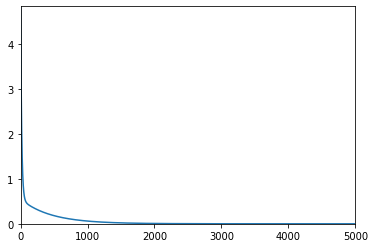

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()

In [ ]:
pred_y = sess.run(predict, feed_dict={
    X : [[3, 10]]
})

In [ ]:
print(pred_y)

[[48.524643]]


# **6. Neural Networks with Sequential and Functional API**

In [ ]:
import os
os.environ['TFF_CPP_MIN_LOG_LEVEL']  = '2'
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import  layers
from tensorflow.keras.datasets import mnist



In [ ]:
#loading dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# reshape x_train, x_test thành mảng (:, 28*28)
x_train = x_train.reshape(-1, 28*28).astype("float32")/255.0
x_test  = x_test.reshape(-1, 28*28).astype("float32")/255.0




In [ ]:
#Sequential API
model = keras.Sequential(
    [
     # tạo layer
     keras.Input(shape=(28 * 28)),
     layers.Dense(512, activation="relu"),
     layers.Dense(256, activation='relu'),
     layers.Dense(10)
    ]
)

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(784)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu", name="my_layer"))
model.add(layers.Dense(10))

In [ ]:
# Functional API (A bit more flexible)
inputs = keras.Input(shape=(784))
x = layers.Dense(512, activation="relu", name="first_layer")(inputs)
x = layers.Dense(256, activation="relu", name="second_layer")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    loss  = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer  = keras.optimizers.Adam(lr = 0.001),
    metrics = ["accuracy"],
)

In [ ]:
model.fit(x_train, y_train, batch_size= 32, epochs= 5, verbose= 2)
model.evaluate(x_test, y_test, batch_size= 32, verbose= 2)

Epoch 1/5
1875/1875 - 11s - loss: 0.1867 - accuracy: 0.9433
Epoch 2/5
1875/1875 - 11s - loss: 0.0786 - accuracy: 0.9753
Epoch 3/5
1875/1875 - 10s - loss: 0.0533 - accuracy: 0.9834
Epoch 4/5
1875/1875 - 10s - loss: 0.0416 - accuracy: 0.9868
Epoch 5/5
1875/1875 - 10s - loss: 0.0321 - accuracy: 0.9897
313/313 - 1s - loss: 0.0679 - accuracy: 0.9807


[0.06790222227573395, 0.9807000160217285]

In [ ]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
None
